In [336]:
import fredapi as fa
import pandas as pd
import plotly.express as px
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## FRED API ##
fred = fa.Fred('6928edb718dc74993ad6d6387be1d1de ')
##

###DATA FRAME FUNCTION ##
def get_fred_data(param_list, start_date, end_date):
  df = pdr.DataReader(param_list, 'fred', start_date, end_date)
  return df.reset_index()

##TOTAL COMPENSATION ##

total_compensation_info = fred.get_series_info('ECIALLCIV')
#print(total_compensation_info['title'])
series ='ECIALLCIV'
compensation_df = get_fred_data(param_list=[series], start_date= '2012-01-01', end_date='2030-01-01')
compensation_df.rename(columns = {'ECIALLCIV':'Total compensation'}, inplace = True)


## INFLATION_INDEX ##
info = fred.get_series_info('CPIAUCSL')
#print(info['title'])
series = 'CPIAUCSL'
inflation_df = get_fred_data(param_list=[series], start_date= '2012-01-01', end_date='2030-01-01')
inflation_df.rename(columns = {'CPIAUCSL':'All Items in U.S. City Average'}, inplace = True)

### Corelation - Compensation and inflation ##
df_compensation_and_inflation = pd.concat([compensation_df, inflation_df])
#print(df_compensation_and_inflation)
fig = px.line(df_compensation_and_inflation, x="DATE", y=["All Items in U.S. City Average", "Total compensation"])
#fig.show()

###Iron and steel cost ###
steel_cost_index = fred.get_series_info('WPU101')
series = 'WPU101'
iron_and_steel_df = get_fred_data(param_list=[series], start_date= '2012-01-01', end_date='2030-01-01')
iron_and_steel_df.rename(columns = {'WPU101':'Iron and Steel cost'}, inplace = True)
#print(steel_cost_index['title'])
#print(steel_cost_index)


###Global price of Aluminum###
aluminum_cost_info = fred.get_series_info('PCU3313133131')
series = 'PCU3313133131'
aluminum_cost_df = get_fred_data(param_list=[series], start_date='2012-01-01', end_date ='2030-01-01')
aluminum_cost_df.rename(columns= {'PCU3313133131': 'aluminum cost'}, inplace = True)
print(aluminum_cost_df)


#Glass and Glass Product Manufacturing Cost##
glass_cost_info = fred.get_series_info('PCU3272132721')
series = 'PCU3272132721'
glass_cost_df = get_fred_data(param_list=[series],  start_date='2012-01-01', end_date ='2030-01-01')
glass_cost_df.rename(columns= {'PCU3272132721': 'glass cost'}, inplace = True)

##Plastic and Rubber Products Manufacturing Cost##
plastic_and_rubber_info = fred.get_series_info('COINDUSZ326')
series = 'COINDUSZ326'
plastic_and_rubber_cost_df = get_fred_data(param_list=[series],  start_date='2012-01-01', end_date ='2030-01-01')
plastic_and_rubber_cost_df.rename(columns= {'COINDUSZ326': 'plastic and rubber cost'}, inplace = True)

## Producer price index for motor vehicle manufacturing

ppi_motor_manuf_info = fred.get_series_info('PCU33613361')
series = 'PCU33613361'
ppi_motor_manuf_df = get_fred_data(param_list=[series],  start_date='2012-01-01', end_date ='2030-01-01')
ppi_motor_manuf_df.rename(columns= {'PCU33613361': 'ppi_motor_manuf'}, inplace = True)

          DATE  aluminum cost
0   2012-01-01        125.600
1   2012-02-01        128.000
2   2012-03-01        129.400
3   2012-04-01        127.800
4   2012-05-01        125.500
..         ...            ...
119 2021-12-01        164.692
120 2022-01-01        172.712
121 2022-02-01        185.600
122 2022-03-01        194.941
123 2022-04-01        206.543

[124 rows x 2 columns]


In [337]:
plastic_and_rubber_cost_df

,DATE,plastic and rubber cost
0,2012-06-01,100.0
1,2012-07-01,99.6
2,2012-08-01,100.0
3,2012-09-01,100.1
4,2012-10-01,100.6
...,...,...
114,2021-12-01,103.8
115,2022-01-01,104.2
116,2022-02-01,103.8
117,2022-03-01,106.0


In [338]:
##ALL BASIC MATERIALS###
all_basic_materials_df = pd.merge(iron_and_steel_df, aluminum_cost_df, how= 'inner' , on = 'DATE')
all_basic_materials_df = pd.merge(all_basic_materials_df, glass_cost_df, how = 'inner', on = 'DATE')
all_basic_materials_df = pd.merge(all_basic_materials_df, plastic_and_rubber_cost_df, how = 'inner', on = 'DATE')

          DATE  Iron and Steel cost  aluminum cost  glass cost  \
0   2012-06-01              239.000        123.800     112.900   
1   2012-07-01              232.100        122.100     112.800   
2   2012-08-01              233.200        121.300     113.600   
3   2012-09-01              233.700        123.300     113.700   
4   2012-10-01              224.800        124.800     113.700   
..         ...                  ...            ...         ...   
114 2021-12-01              433.252        164.692     152.155   
115 2022-01-01              422.561        172.712     156.283   
116 2022-02-01              392.904        185.600     157.766   
117 2022-03-01              397.664        194.941     155.362   
118 2022-04-01              402.512        206.543     155.852   

     plastic and rubber cost  
0                      100.0  
1                       99.6  
2                      100.0  
3                      100.1  
4                      100.6  
..                   

In [339]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

fig = px.line(all_basic_materials_df, x= 'DATE', y= ['Iron and Steel cost', 'aluminum cost' , 'glass cost','plastic and rubber cost'], title='Raw material historical' )

app = Dash(__name__)


app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [340]:
# Adjusting series to the same index. Base year = 2012

all_basic_materials_df_adj= all_basic_materials_df
all_basic_materials_df_adj.iloc[:,1:] = (all_basic_materials_df.iloc[:,1:] / all_basic_materials_df.iloc[0,1:]) *100

ppi_motor_manuf_df_adj= ppi_motor_manuf_df
ppi_motor_manuf_df_adj.iloc[:,1:] = (ppi_motor_manuf_df.iloc[:,1:] / ppi_motor_manuf_df.iloc[0,1:]) *100

compensation_df_adj= compensation_df
compensation_df_adj.iloc[:,1:] = (compensation_df_adj.iloc[:,1:] / compensation_df_adj.iloc[0,1:]) *100

inflation_df_adj= inflation_df
inflation_df_adj.iloc[:,1:] = (inflation_df_adj.iloc[:,1:] / inflation_df_adj.iloc[0,1:]) *100


In [341]:
#Merging ppi with all basic materials

all_components_df_adj = pd.merge(all_basic_materials_df, ppi_motor_manuf_df_adj, how = 'left', on = 'DATE')
all_components_df_adj = pd.merge(all_components_df_adj, compensation_df_adj, how = 'left', on = 'DATE')


In [342]:
# Total compensation is trimestral, therefore NaN exist in the dataframe. It needs to be filled with the previous available number
all_components_df_adj= all_components_df_adj.fillna(method= 'bfill')
all_components_df_adj= all_components_df_adj.interpolate(limit=3, limit_direction= "forward")

In [343]:
# Plotting the graph with new indexes
##  Analysing 2020 onwards - Here we can see that the glass and plastic/ rubber kept relatively stable. The drivers of cost are iron/steel and aluminum
### Metals have been pushing the production cost in the past 2 years
### Motor vehicle manufacturers were able to manage the increasing costs

fig = px.line(all_components_df_adj, x= 'DATE', y= ['Iron and Steel cost', 'aluminum cost' , 'glass cost','plastic and rubber cost','ppi_motor_manuf', 'Total compensation'], title=' Cost drivers' )
fig.show()

In [344]:
# KPI's ideas: 1 month variation, 3 month's variation - Hypothesis: 6 months  pushing either way should /n
# trigger alert for securing longer contracts - shorter contracts

Kpi_1month_basic_mat=  (( (all_basic_materials_df_adj.iloc[-1,1:] /all_basic_materials_df_adj.iloc[-2,1:]) )-1) *100

Kpi_6month_basic_mat = (((all_basic_materials_df_adj.iloc[-1,1:] /all_basic_materials_df_adj.iloc[-6,1:]) )-1) *100


In [345]:
# PPI motor manufacturers and compensation visualization
# PPI motor manufacturers appears to be affected by seasonality - costs plummet in july and reach an high in oct
### Hypothesis: Factory shutdown / near stop in the summer breaks drop costs, which increase once the factory reopens at full capacity

fig = px.line(all_components_df_adj, x= 'DATE', y= ['ppi_motor_manuf', 'Total compensation'], title=' Cost drivers' )
fig.show()

In [346]:
# Set date as index 

all_components_df_adj= all_components_df_adj.set_index('DATE')

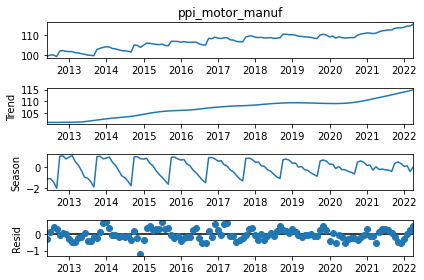

In [347]:
from statsmodels.tsa.seasonal import STL

# The decomposed series confirms seasonality and a clear upward trend


stl = STL(all_components_df_adj['ppi_motor_manuf'], seasonal=13)
res = stl.fit()
fig = res.plot()

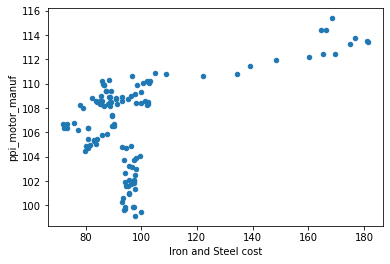

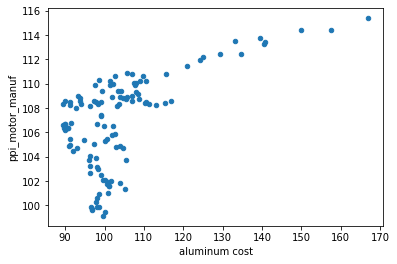

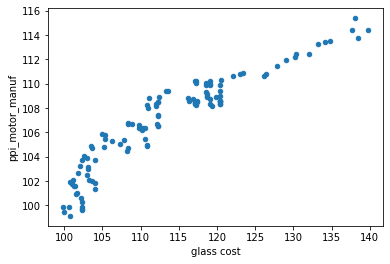

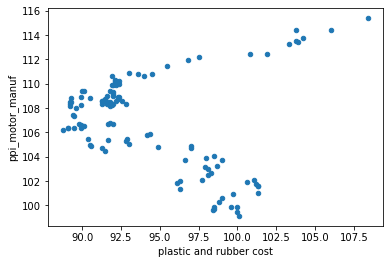

In [356]:
# Understand the relationship between cost drivers and production cost - E.g., Glass vs PPI_motor_manufacturers follows a logartimic distribution

for i in all_basic_materials_df_adj.iloc[:,1:].columns:
    all_components_df_adj.plot.scatter(x= i , y= 'ppi_motor_manuf')

In [371]:
# Testing ideas for prediction - Check other models and approaches

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate


from sklearn.model_selection import TimeSeriesSplit

X= all_components_df_adj[['Iron and Steel cost', 'aluminum cost' , 'glass cost','plastic and rubber cost', 'Total compensation']]
y=all_components_df_adj['ppi_motor_manuf']

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=10
)


regressor = LinearRegression().fit(X,y)  

def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(regressor, X, y, cv=ts_cv)

Mean Absolute Error:     3.566 +/- 1.859
Root Mean Squared Error: 3.849 +/- 1.785


In [404]:
# Testing idea of using values from client to plot the cost evaluation

iron_and_steel= float(input('Submit the percentage of iron and steel for the desired car model: '))
aluminum = float(input('Submit the percentage of aluminum for the desired car model: '))
plastic_and_ruber= float(input('Submit the percentage of plastic and rubber for the desired car model: '))
glass= float(input('Submit the percentage of glass for the desired car model: '))


average_producer_cost = (iron_and_steel)/100 * all_components_df_adj.iloc[:,0] + (aluminum/100) * all_components_df_adj.iloc[:,1] + (glass/100) * all_components_df_adj.iloc[:,2]+ (plastic_and_ruber/100)*all_components_df_adj.iloc[:,3]

user_df = pd.DataFrame(average_producer_cost, columns=['User product index'])

fig= px.line(user_df, y='User product index')
fig.show()

Submit the percentage of iron and steel for the desired car model: 30
Submit the percentage of aluminum for the desired car model: 20
Submit the percentage of plastic and rubber for the desired car model: 20
Submit the percentage of glass for the desired car model: 30


Included:
- Transformed indexes to the same bases
- Transformed n.a.'s into the last values for salaries - frequency was trimestral rather than monthly data
- Fixed some of the merges ( from inner to left, in order to maintain all data in the Df)
- At the end of the code, there is the first draft for user's to submit the percentage values for different cars
- Some Ideas:
1- Use 1 and 6 month's variations as KPI's to trigger potential negotiation ahead
2- Machine learning  or statistical models to forecast the indexes that we have